In [1]:
import d2l
from mxnet import autograd, np, npx
import random

npx.set_np()

In [2]:
def synthetic_data(w, b, num_examples):
    
    X = np.random.normal(0,1, (num_examples, len(w)))
    y = np.dot(X,w) + b
    y = np.random.normal(0, 0.01, y.shape)
    return X, y

In [3]:
true_w = np.array([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features', features[0], '\n label', labels[0])

features [1.1630785 2.2122061] 
 label -0.006187443


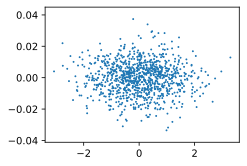

In [5]:
d2l.set_figsize((3.5, 2.5))
d2l.plt.scatter( features[:,1].asnumpy(), labels.asnumpy(), 1)

# READING DATASET

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
    

In [8]:
batch_size = 10 

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[[ 0.9695946   0.5721275 ]
 [ 0.6581289   0.14528377]
 [ 0.6005229  -0.05871473]
 [-1.9173642  -0.11660124]
 [-2.3413255   1.0210714 ]
 [ 0.49228418  0.20672235]
 [-1.0978827   0.97949445]
 [-1.522743   -0.52853745]
 [-1.0196888  -0.26588425]
 [-1.3176708   0.694964  ]] 
 [-0.0072437  -0.01233335  0.00485242 -0.00119149 -0.02288567  0.01070783
  0.00450334 -0.02037557 -0.0034497   0.02841117]


# INIT MODEL PARAMETERS

In [9]:
w = np.random.normal(0,0.01, (2,1)) # 2 features 1 labels
b = np.zeros(1) 

In [10]:
w.attach_grad()
b.attach_grad()

# DEF MODEL

In [11]:
def linreg(X, w, b):
    return np.dot(X, w) + b


    

# DEF LOSS 

In [12]:
def squared_loss( y_hat, y):
    return( y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# DEF OPTIMIZATION

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

# TRAINING

In [14]:
lr = 0.001
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X,w,b), y)
        l.backward()
        sgd([w,b], lr, batch_size)
    
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch+1, train_l.mean().asnumpy()))

epoch 1, loss 0.000074
epoch 2, loss 0.000070
epoch 3, loss 0.000067


In [15]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w [ 1.9991155 -3.4054008]
Error in estimating b [4.200062]
